In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cantera as ct

In [3]:
def func(T, A, n, Ea):
    return np.log(A) + n*np.log(T)+ (-Ea/(1.987*T))

def calc_rc(T,A,n,Ea):
    k = []
    for temp in T:
        k.append(A *(temp**n)* np.exp(-Ea/ (1.987* temp)))
    return k

In [15]:
df = pd.read_csv('O_H2_OH_O.csv')

931392.7378703641 2.280181790871525 6542.415395433161


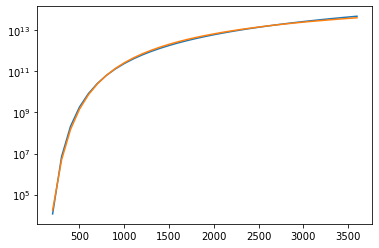

In [16]:
popt, pcov = curve_fit(func, df['T'], np.log(df['k']))
k_fit = calc_rc(df['T'],popt[0],popt[1],popt[2])
print(popt[0],popt[1],popt[2])
plt.semilogy(df['T'],k_fit)
plt.semilogy(df['T'],df['k'])

In [18]:
#OH + H2 = H2O + H

A = 4.2e-17*6.023e23
print(A)
n=1.78
Ea = 1453*1.987
print(Ea)

25296599.999999996
2887.1110000000003


In [21]:
#CO + OH = HOCO

T= np.arange(200,2500)
k=[]
for temp in T:
    kcalc= (10**-3.37)*(temp**-3.50)*np.exp(-887.2/temp)
    k.append(kcalc*6.023e23)

2.569288441741996e+20 -3.5 1762.8664000000003


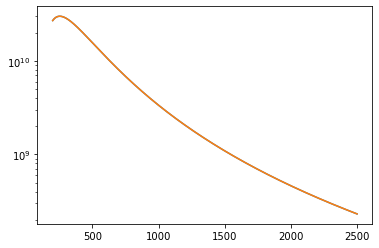

In [22]:
popt, pcov = curve_fit(func, T, np.log(np.array(k)))
k_fit = calc_rc(T,popt[0],popt[1],popt[2])
print(popt[0],popt[1],popt[2])
plt.semilogy(T,k_fit)
plt.semilogy(T,k)

In [23]:
#CO + OH = H + CO2

T= np.arange(200,2500)
k=[]
for temp in T:
    kcalc= (10**-17.84)*(temp**1.73)*np.exp(-(-334.9)/temp)
    k.append(kcalc*6.023e23)

870588.3739202741 1.7299999999999998 -665.4462999999996


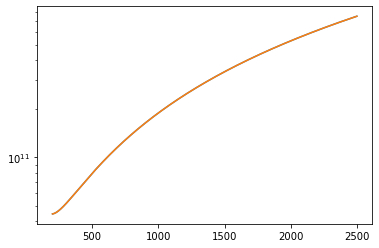

In [24]:
popt, pcov = curve_fit(func, T, np.log(np.array(k)))
k_fit = calc_rc(T,popt[0],popt[1],popt[2])
print(popt[0],popt[1],popt[2])
plt.semilogy(T,k_fit)
plt.semilogy(T,k)